# Using Seedlists to Extract Sets of Keywords from Free-Flowing Texts #

## Build your seedlist ##

In order to extract the relevant keywords from our data set, we first have to decide what they are. We need a list of keywords, often called a *seedlist*. Keywords will often have many several linguistic forms, such as "God", "God's", and "Gods". Seedlists are typically full form lists, containing all variations of a keyword, but getting all the variants right can be tricky. We can therefore normalize the texts (e.g., casefolding/lower casing, removal of punctuation) before extraction.

In [24]:
seeds = ["God","man","America","John"]# what are my keywords
seedlist = [keyword.lower() for keyword in seeds]# casefold the keywords, remember to casefold the data also
print(seedlist)

['god', 'man', 'america', 'john']


## Build your data set ##

Here we import all the `.txt` (plain text) files on your path `data_path`.

"A *path*, the general form of the name of a file or directory, specifies a unique location in a file system. A path points to a file system location by following the directory tree hierarchy expressed in a string of characters in which path components, separated by a delimiting character, represent each directory. The delimiting character is most commonly the slash ("/"), the backslash character ("\"), or colon (":"), though some operating systems may use a different delimiter. Paths are used extensively in computer science to represent the directory/file relationships common in modern operating systems, and are essential in the construction of Uniform Resource Locators (URLs). Resources can be represented by either absolute or relative paths." ([Wiki/Path (Computing)](https://en.wikipedia.org/wiki/Path_(computing))

In [25]:
import glob, os

file_ending = "txt"
data_path = os.path.join("..","data","inaugural_address","*."+file_ending)# where are my data?

# confirm you path and files
print("your data set is located at {} and are {} files"
      .format(os.path.abspath(data_path.split("*")[0]),data_path.split("*")[-1]))

filenames = sorted(glob.glob(data_path))

texts = list()
for filename in filenames:
    with open(filename,"r") as f:
        texts.append(f.read().lower())# casefold each document

your data set is located at /home/knielbo/Documents/education/hist_03/metode_3_18/hist_informatics/data/inaugural_address and are .txt files


## keyword extraction ##

Read through every text and stored occurrences of a keyword from our seedlist in four steps:
1. loop over every text 
2. for every text we preprocess by tokenization (word identification) and remove ",",".",";" from every token
3. for every text we store unique occurrences of keyword
4. append every occurrence to a file object `result.txt`

In [26]:
file_path = os.path.join("..","data","result.txt")

for text in texts:
    matches = 0
    stored_matches = list()
    #for each text:
    tokens = text.split()
    
    for token in tokens:
        #preprocessing remove punctuation that will interfere with matching
        token = token.replace(",", "")
        token = token.replace(".", "")
        token = token.replace(";", "")
        
        if token in seedlist:
            
            if token in stored_matches:
                continue
                
            else:
                stored_matches.append(token)
            
            matches += 1
            
    if matches == 0:
        print("")
    else:
        match_string = ""
        for stored_match in stored_matches:
            match_string = match_string + stored_match + "\t"

        print(match_string)
        
        with open(file_path,"a") as fname:
            fname.write(match_string)


america	
america	
man	
man	



america	god	
man	


america	
man	
man	

man	god	
god	man	america	
man	
god	man	
man	god	
man	

man	god	america	
man	god	
god	man	
god	man	
god	
god	

man	america	god	
man	god	
man	god	america	
america	man	god	
america	man	god	
god	america	man	
god	
america	
man	america	god	
god	
man	god	
god	man	america	
god	america	
god	man	america	
god	man	america	
america	man	god	
america	god	
man	america	
man	america	god	
john	god	america	man	
man	america	god	
america	god	
america	man	god	
america	god	john	
america	man	god	
america	man	god	
god	america	
america	god	


## (key-)word counts ##

In this section we compute the relative frequency of each keyword in each text in four steps:
1. loop over every keyword
2. for each keyword we loop over and preprocess each text
3. append relative frequency of each keyword in each text to a list `signal`
4. we store each `signal` in a dictionary `signals`

Notice that we use the reguler expressions (or regex) `\W+` to tokenize each text. `\W` is a metacharacter that matches non-alphanumeric characters and. `+` is also a metacharacter that matches the preceding pattern element (in this case `\W`) one or more times. Taken together `\W+` means match one of more occurrences of non-alphanumeric characters. For tokenization we use the `.split()` method to say split every text on occurrences of one of more occurrences of non-alphanumeric characters. So the string `"he crossed the road"` becomes `["he","crossed","the","road"]`. This procedure also manage certain English variants, such as the contraction `"he's very happy"` becomes `["he","s","very","happy"]`.

A *regular expression*, regex is a sequence of characters that define a search pattern. Usually this pattern is used by string searching algorithms for "find" or "find and replace" operations on strings, or for input validation. ([Wiki/Regular expression](https://en.wikipedia.org/wiki/Regular_expression))


In [27]:
import re

# tokenizer pattern
pat = re.compile(r"\W+") 

signals = dict()# dictionary for keyword timeseries

for keyword in seedlist:
    signal = list()
    
    for text in texts:
        tokens = pat.split(text.lower())
        fr = tokens.count(keyword)/len(tokens)
        signal.append(fr)
   
    # store in dictionary
    signals[keyword] = signal

print(signals["god"])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00022306491188935982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00029895366218236175, 0.00035248501938667606, 0.0, 0.0084985835694051, 0.00088261253309797, 0.0, 0.0, 0.0010023387905111927, 0.0005913660555884093, 0.00045433893684688776, 0.0009857072449482504, 0.0005028916268544129, 0.0009000900090009, 0.0, 0.00018372221201543268, 0.0011682242990654205, 0.0013054830287206266, 0.002091425156856887, 0.0002464268112370626, 0.0005595970900951316, 0.0010615711252653928, 0.0, 0.0007401924500370096, 0.0035650623885918, 0.001312910284463895, 0.0020234722784297854, 0.0006006006006006006, 0.002188183807439825, 0.002006688963210702, 0.0028142589118198874, 0.002197802197802198, 0.0008123476848090983, 0.002043318348998774, 0.0030935808197989174, 0.0012831479897348161, 0.0012414649286157666, 0.00046040515653775324, 0.0018808777429467085, 0.0014367816091954023, 0.0020721094073767096, 0.0023518344308560675, 0.002805049088359046]


### visualize with trend detection ###

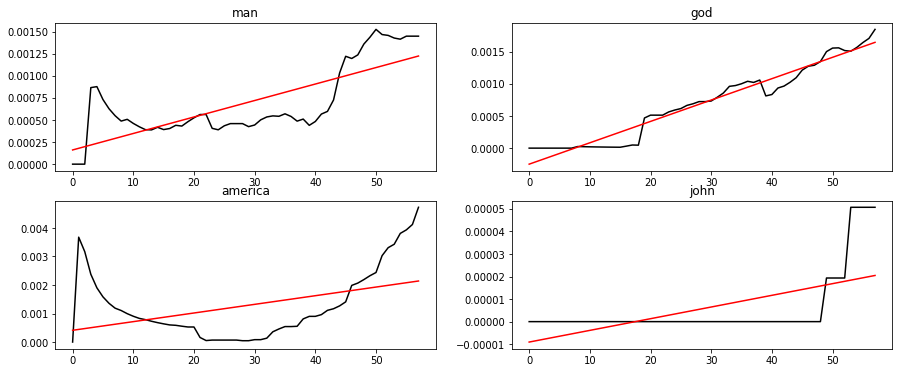

In [28]:
import matplotlib.pyplot as plt
import numpy as np

degree = 1

fig, ax = plt.subplots(2,int(np.ceil(len(signals.keys())/2)), figsize=(15, 6), facecolor='w', edgecolor='k')
ax = ax.ravel()
flag = 0
for key, value in signals.items():
    # variables
    x = range(len(value))
    y = value
    # polynomial fit for trend detection
    p_fit = np.poly1d(np.polyfit(x,y,degree))
    
    ax[flag].plot(x,y,"k",x,p_fit(x),"red")
    ax[flag].set_title(key)
    
    flag += 1

plt.show()
#plt.savefig("../figures/signals.png",dpi = 300)
#plt.close()


### Filtering a time series with a function ###

With [Ngram viewer](https://books.google.com/ngrams) we saw that smoothing a time series with a moving average filter make the trend more apparent by smooting within a window. In Python user-created functions are an efficient way to make your code re-usable. In this excercise you have to use the supplied `smooth()` function on the visualization from the previous block.

A function is a block of code which only runs when it is called. You can pass data, known as parameters, into a function. A function can return data as a result:

```
def hello_world():
    print("Hello World!")
    
>>> hello_world()
Hello World!

```

In [29]:
def smooth(l, n = 5):
    """moving average filter with window size n"""
    sigma = 0
    res = list( 0 for x in l)
    for i in range(0 , n):
        sigma = sigma + l[i]
        res[i] = sigma / (i + 1)
    for i in range( n, len(l) ):
        sigma = sigma - l[i - n] + l[i]
        res[i] = sigma / n
    return res